# Team backpropagate<br>                  
Group Members:<br>
+ Zahra Hoobakht

# Table of Contents
* [ Introduction ](#0)
* [1. Business Understanding](#1)
    * [1.1 Why this data analysis is important ?](#1.1)
    
* [2. Data Understanding](#2)
    * [2.1 Data discription](#2.1)
    * [2.2 Data cleaning & quality checking](#2.2)
    * [2.3 Imputation Techniques](#2.3)
* [3. Data Visualization](#3)
* [4. Dimensional reduction](#4)
* [5. Uniform manifold Approximation and projection(UMAP)](#5)

* [6. References](#X)

# Introduction

Our research aims to use a healthcare stroke dataset to make informed decisions about an individual's risk of suffering from a stroke. We evaluate multiple health features such as gender, age, BMI, glucose levels, hypertension, and heart disease to determine the extent to which they should be weighted when providing health recommendations to at-risk individuals and when evaluating the risk portfolio of life insurance policies.

Stroke is a critical health condition that affects millions of people globally and is the 5th leading cause of death and the primary cause of disability in the United States [1]. However, it can be prevented through lifestyle changes such as losing weight, quitting smoking, and controlling cholesterol, as suggested by the American Stroke Association [2].

The dataset is comprised of anonymous patient records in the United States and aims to establish connections between factors like stroke, BMI, and smoking status. To uncover any regional health trends, we recommend supplementing the data with geographic location information in future collections.

The information derived from this research will be of great value to multiple stakeholders, including health counselors and life insurance adjusters. Health counselors can use this data to identify risk factors in their patients' lives and help them avoid serious illnesses like stroke. Life insurance adjusters, on the other hand, can use the data to offer customized premiums based on an individual's risk profile.

In conclusion, our research will be beneficial to both health counselors and life insurance adjusters by providing them with valuable insights into the risk of stroke and allowing them to make informed decisions about health and life insurance premiums. By improving the overall health of individuals, this research will also benefit the healthcare industry as a whole.

# Business Understanding

## 1.1 Why this data analysis is important ?
### &nbsp; **in this section we want to answer following questions:**
+ **why is this data analysis important?**
+ **who can use this dataset?**
+ **How important is our prediction?**


&nbsp; According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patients.
<br>
<br>
&nbsp; Analyzing this data can be helpful in pre-diagnosis and preventing stroke and its consequences such as Speech and language Problems,Swallowing, Memoryloss , disability of part of body ,etc. which some of them are inversible.
We believe that if the medical team can create a database using the aforementioned features, it can provide them an insights that are effective in preventing stroke and controlling patients' health. This analysis can also be helpful for offering insurance to patients who are more likely to have stroke to help them afford the expenses.
<br>
<br>
&nbsp; As with all other medical information, the analysis of this dataset should be so accurate and the result could be life saver especially for the ones who wrongly classifed as those who are not in the danger.

========================================================================

Dataset: Storke Prediction Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Question Of Interest: Which types of life insurance premium/costs works for the clients better?

## Data Understanding

### 2.1 Data Description

loading data and necessary library packages

In [1]:
#%pip install hdbscan
import pandas as pd
import numpy as np
import missingno as mn
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn import preprocessing
from sklearn.impute import KNNImputer
import seaborn as sns
import bokeh
from sklearn.decomposition import PCA
#%pip install plotly
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import copy
# import datashader
# import holoviews
#import umap  # Requires python3.10 or lower; python3.11 does not work
#import umap.plot
import hdbscan  # for UMAP DBSCAN plot

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="umap")
warnings.filterwarnings("ignore", category=UserWarning, module="umap.plot")
df = pd.read_csv('C://Users/Hedieh/Documents/SMU/ML-Py/healthcare-dataset-stroke-data.csv') 
df_original=df

Defining our attributes, their type and description

| Attribute         | Attr. type   | Description                                                  |
| :-----------------: | :-------: | :------------------------------------------------------------ |
| Gender            | Nominal |  Sex of individual surveyed. Male or female.                  |
| Age               | Ratio   | Age of individual surveyed.                                  |
| Hypertension      | Nominal | Individual reported either having or not having hypertension. |
| Heart Disease     | Nominal | Individual reported either having or not having heart disease. |
| Married           | Nominal | Individual reported previously (or currently) married.       |
| Work Type         | Nominal | Individual reported employment status (private, self-employed). |
| Residence Type    | Nominal | Individual reported type of residence (urban, rural).        |
| AVG Glucose Level | Ratio   | Individual reported average glucose level.                   |
| BMI               | Ratio   | Individual reported BMI.                                     |
| Smoking Status    | Ordinal | Individual reported smoking status (Unknown, Never Smoked, Formerly Smoked, Smokes). |
| Stroke            | Nominal | Individual reported eiother having or not having a stroke.   |


In [2]:
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

### 2.1 Data cleaning & quality checking

**1. checking duplicates & cleaning unnecessary data**

compare the length of list and set to check if the dataset contains duplicates or not. 


In [3]:
# compare the length of list and set to check if the dataset contains duplicates
if len(set(df.id)) != len(df.id):
    print("duplicates found in the list")
else:
    print("No duplicates found in the list")


categorical_features_column=['gender','ever_married','work_type','Residence_type','smoking_status']
for col in categorical_features_column:
    print(df[col].value_counts())
    


No duplicates found in the list
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


================================================
<br><br>
ID column is removed because it does not contain any useful information.
<br> only one 'other' option in gender column can be found which cannot be compared with other datas so it is removed

In [4]:
del df['id']
genderValues=['Other']
df = df[df.gender.isin(genderValues) == False]


**2. How related our features to our data**

In this survey, we are investigating for answers to the following questions?
+ Is one gender more susceptible to stroke compared to the other?
+ Do people with a certain type of work require ongoing medical attention?
+ Does living in urban areas increase the risk of stroke and impact health?
+ Is smoking a risk factor for stroke and can quitting smoking lead to improvement?
+ Does age play a significant role in the occurrence of stroke?
+ Are married individuals more at risk of stroke compared to those who are single?
+ Do health factors such as hypertension and average glucose level affect stroke?
+ Do people with a history of heart disease show more stroke symptoms?
+ Are obese individuals more at risk of stroke?
+ Does the combination of health factors such as hypertension and heart disease increase the risk of stroke?


Based on our initial assumptions, we believe:

+ Gender is not a factor in stroke occurrence.
+ Individuals with stressful jobs, such as self-employed individuals or those in government positions, may be more at risk of stroke.
+ We anticipate that the number of strokes among individuals living in urban areas will be higher compared to those living in rural areas.
+ We also believe that younger individuals are less likely to experience a stroke.
+ We think that married individuals may be more susceptible to stroke due to higher stress levels.
+ We believe that health factors such as hypertension and glucose levels have a direct impact on stroke.
+ Additionally, we think that individuals with a history of heart disease are more likely to experience stroke symptoms.
+ Furthermore, we believe that obesity increases the risk of stroke.
+ Finally, we think that the combination of hypertension and heart disease history may increase the possibility of stroke.

**Now let's analysis the data and see how close are our first assumptions to the tested results**


for this analysis, at first we need to replacing categorical features with numerical indicators and search for any missing data

**3.replacing categorical features with numerical indicators**

In [5]:
warnings.simplefilter('ignore')
# replace gender to numrical indicator 0 for Male, 1 for female
df.gender.replace(to_replace = ['Male', 'Female'], value = range(0,2), inplace = True)
# replace ever married status to numrical indicator 0 for No, 1 for Yes
df.ever_married.replace(to_replace = ['No', 'Yes'], value = range(0,2), inplace = True)
# replace work type to numrical indicator 0 for Children, 1 for Govt_job,
#2 for Never_worked, 3 for Private, 4 for Self-employed
df.work_type.replace(to_replace = ['children', 'Govt_job','Never_worked','Private','Self-employed'], value = range(0,5), inplace = True)
#replace Residence type status to numrical indicator 0 for Rural, 1 for Urban
df.Residence_type.replace(to_replace = ['Rural', 'Urban'], value = range(0,2), inplace = True)
# replace smoking status to numrical indicator 0 for formerly smoked, 1 for never smoked,
#2 for smokes, NaN for Unknown
df.smoking_status.replace(to_replace = ['formerly smoked', 'never smoked','smokes'], value = range(0,3), inplace = True)
df.smoking_status.replace(to_replace = ['Unknown'], value = np.nan, inplace = True)
df.head(10)


gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          3   
1       1  61.0             0              0             1          4   
2       0  80.0             0              1             1          3   
3       1  49.0             0              0             1          3   
4       1  79.0             1              0             1          4   
5       0  81.0             0              0             1          3   
6       0  74.0             1              1             1          3   
7       1  69.0             0              0             0          3   
8       1  59.0             0              0             1          3   
9       1  78.0             0              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6             0.0       1  
1               0             202.21   NaN             1.0       1  
2               0             105.92  32.5             1.0       1  
3               1             171.23  34.4             2.0       1  
4               0             174.12  24.0             1.0       1  
5               1             186.21  29.0             0.0       1  
6               0              70.09  27.4             1.0       1  
7               1              94.39  22.8             1.0       1  
8               0              76.15   NaN             NaN       1  
9               1              58.57  24.2             NaN       1

In [6]:
# find the data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     3565 non-null   float64
 10  stroke             5109 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 479.0 KB
None


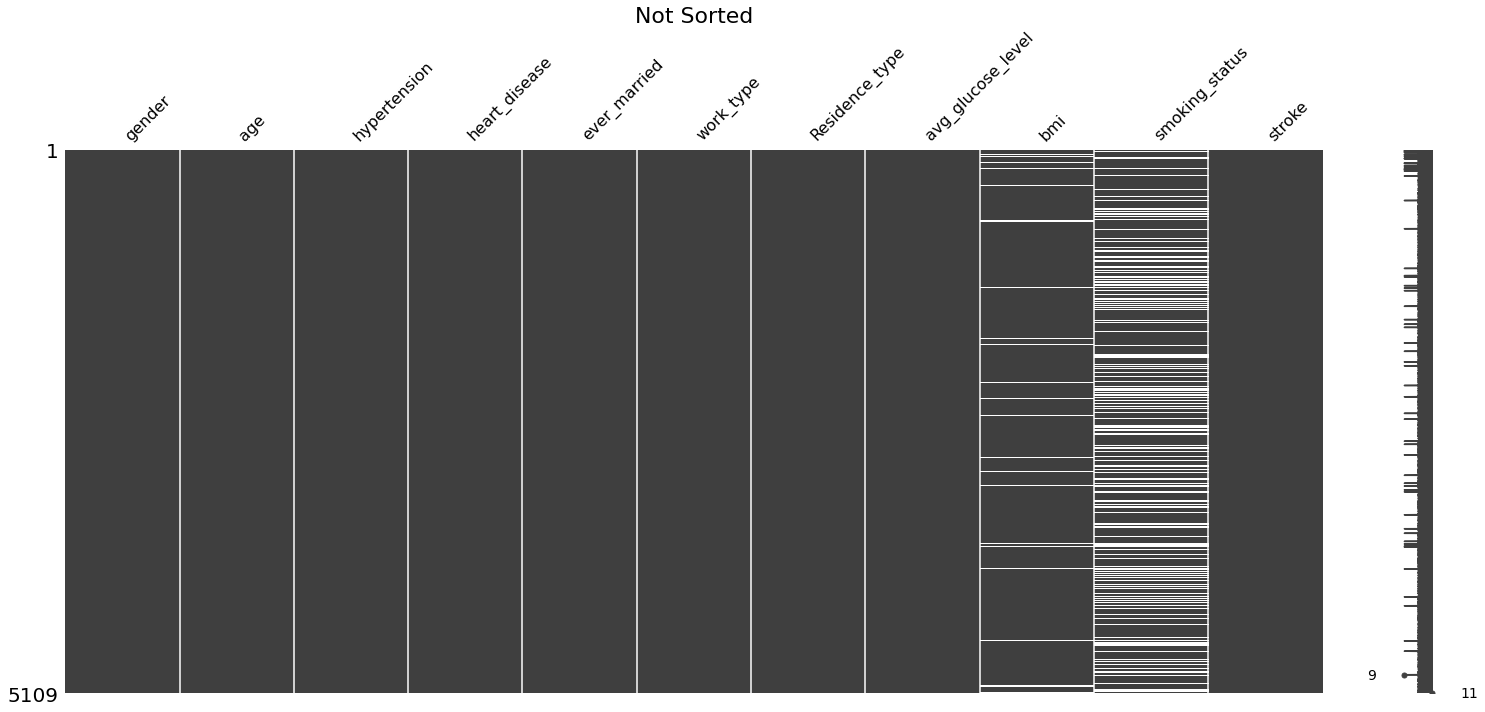

<Figure size 432x288 with 0 Axes>

In [7]:
mn.matrix(df)
plt.title("Not Sorted",fontsize=22)
plt.figure()
mn.matrix(df.sort_values(by=["smoking_status","bmi"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [8]:
print(  df['bmi'].isna().sum().sum() ,"value from 5109 samples is missing in bmi column")
print(df['smoking_status'].isna().sum().sum(), "value from 5109 samples is missing in smoking_status column ")

201 value from 5109 samples is missing in bmi column
1544 value from 5109 samples is missing in smoking_status column 


In [9]:
#I want to check what will happen if we drop the nan values
df.dropna()
df.dropna().describe()
#our data shows that if we drop the NaN datas our statistics will completely change
#so I think it is better to keep the NaN datas and replace them with the neighborhood values

gender          age  hypertension  heart_disease  ever_married  \
count  3425.000000  3425.000000   3425.000000    3425.000000   3425.000000   
mean      0.609051    48.652555      0.119124       0.060146      0.758832   
std       0.488034    18.850018      0.323982       0.237792      0.427854   
min       0.000000    10.000000      0.000000       0.000000      0.000000   
25%       0.000000    34.000000      0.000000       0.000000      1.000000   
50%       1.000000    50.000000      0.000000       0.000000      1.000000   
75%       1.000000    63.000000      0.000000       0.000000      1.000000   
max       1.000000    82.000000      1.000000       1.000000      1.000000   

         work_type  Residence_type  avg_glucose_level          bmi  \
count  3425.000000     3425.000000        3425.000000  3425.000000   
mean      2.819854        0.509489         108.311670    30.292350   
std       0.966714        0.499983          47.706754     7.295778   
min       0.000000        0.000000          55.120000    11.500000   
25%       3.000000        0.000000          77.230000    25.300000   
50%       3.000000        1.000000          92.350000    29.100000   
75%       3.000000        1.000000         116.200000    34.100000   
max       4.000000        1.000000         271.740000    92.000000   

       smoking_status       stroke  
count     3425.000000  3425.000000  
mean         0.971095     0.052555  
std          0.677177     0.223175  
min          0.000000     0.000000  
25%          1.000000     0.000000  
50%          1.000000     0.000000  
75%          1.000000     0.000000  
max          2.000000     1.000000

===================================================
<br>
<br>
Based on the dataframe information, some missing values are found in the dataset in the bmi and smoking_status columns.
we believe that these missing data might occur because some patients did not know how to calculte their bmi or they did not want to share bmi and smoking status.  
the number of missing values in the bmi column can be replaced by the imputation. the smoking_status variable seems to be missing about 30% of the values. That might be too many to impute but due to educational purpose, we decided to impute it and if our results does not make sense we will eliminate it.also our data shows that if we drop the NaN datas our statistics will completely change so for now we stick to the imputation plan
#so I think it is better to keep the NaN datas and replace them with the neighborhood values
<br>
**we will use mean imputation for the numerical features (bmi) and mode for the categorical features (smoking_status).**


## 2.3 Imputation Techniques
Let's try two methods of imputation on the bmi and smoking_status variables to see which one works better:

+ **Split-Imput-Combine (SIC)**
+ **K-Nearest Neighbor Imputation (KNN)**


* SIC uses discrete groupings of instances, KNN does not
* KNN needs normalized  data
* KNN imputes values based on distances, SIC does not
- KNN does not use statistics like median, mode, or mean to fill in values, SIC does



## Split-Impute-Combine in Pandas

Impute smoking_status values using mode grouped by 'age','hypertension','heart_disease','work_type','Residence_type','stroke' then use this grouping to fill the data set in each group, then transform back

In [10]:
df_smoking_grouped = df.groupby(by=['age','hypertension','heart_disease','work_type','Residence_type','stroke']) # perform the grouping of thing related to 'smoking status'
func = lambda grp: grp.fillna(grp.mode()) # within groups, fill using mode (define function to do this)
numeric_columns = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi',"smoking_status","stroke"] # only transform numeric columns
df_smoking_imputed_sic = df_smoking_grouped[numeric_columns].transform(func) # apply impute and transform the data back

# Extra step: fill any object columns that could not be transformed
col_deleted = list( set(df.columns) - set(df_smoking_imputed_sic.columns)) # in case the median operation deleted columns
df_smoking_imputed_sic[col_deleted] = df[col_deleted]

# drop any rows that still had missing values after grouped imputation
df_smoking_imputed_sic.dropna(inplace=True)

#  Rearrange the columns
df_smoking_imputed_sic = df_smoking_imputed_sic[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type',"avg_glucose_level",'bmi',"smoking_status","stroke"]]
df_smoking_imputed_sic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   int64  
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   int64  
 5   work_type          3425 non-null   int64  
 6   Residence_type     3425 non-null   int64  
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   float64
 10  stroke             3425 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 321.1 KB


==================================================
<br>
Impute bmi values using mean grouped by 'age','hypertension','heart_disease','work_type','stroke' then use this grouping to fill the data set in each group, then transform back

In [11]:

df_bmi_grouped = df.groupby(by=['hypertension','heart_disease','work_type','stroke']) # perform the grouping of thing related to 'smoking status'
func = lambda grp: grp.fillna(grp.mean()) # within groups, fill using median (define function to do this)
numeric_columns = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi',"smoking_status","stroke"] # only transform numeric columns
df_bmi_imputed_sic = df_bmi_grouped[numeric_columns].transform(func) # apply impute and transform the data back

# Extra step: fill any object columns that could not be transformed
col_deleted = list( set(df.columns) - set(df_bmi_imputed_sic.columns)) # in case the median operation deleted columns
df_bmi_imputed_sic[col_deleted] = df[col_deleted]

# drop any rows that still had missing values after grouped imputation
df_bmi_imputed_sic.dropna(inplace=True)

# Rearrange the columns
df_bmi_imputed_sic = df_bmi_imputed_sic[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type',"avg_glucose_level",'bmi',"smoking_status","stroke"]]
df_bmi_imputed_sic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5106 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5106 non-null   int64  
 1   age                5106 non-null   float64
 2   hypertension       5106 non-null   int64  
 3   heart_disease      5106 non-null   int64  
 4   ever_married       5106 non-null   int64  
 5   work_type          5106 non-null   int64  
 6   Residence_type     5106 non-null   int64  
 7   avg_glucose_level  5106 non-null   float64
 8   bmi                5106 non-null   float64
 9   smoking_status     5106 non-null   float64
 10  stroke             5106 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 478.7 KB


## Nearest Neighbor Imputation with Scikit-learn

Now let's try to fill in the bmi and smoking_status variables by selecting the 3 nearest data points to the given observation. 
<br>
<b> at first we need to normalize our data

In [12]:
col=['age','avg_glucose_level','bmi']
df_normalized=pd.DataFrame( columns=['age','avg_glucose_level','bmi'])
for i in col:
    df_normalized[i]=(df[i]-df.mean()[i])/df.std()[i]
    

In [13]:
df_normalized

age  avg_glucose_level       bmi
0     1.051139           2.706185  0.981045
1     0.785812           2.121444       NaN
2     1.626015          -0.004867  0.459039
3     0.255157           1.437332  0.700944
4     1.581794           1.501150 -0.623168
...        ...                ...       ...
5105  1.626015          -0.494433       NaN
5106  1.670236           0.420881  1.413928
5107 -0.363940          -0.511216  0.217134
5108  0.343600           1.328245 -0.419458
5109  0.034051          -0.460647 -0.343067

[5109 rows x 3 columns]

In [14]:
header=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']
df_total_after_normalization=pd.DataFrame( columns=header)
for i in header:
    if i in df_normalized.columns:
        df_total_after_normalization[i]=df_normalized[i]
    else:
        df_total_after_normalization[i]=df[i]

In [15]:
df_total_after_normalization

gender       age  hypertension  heart_disease  ever_married  work_type  \
0          0  1.051139             0              1             1          3   
1          1  0.785812             0              0             1          4   
2          0  1.626015             0              1             1          3   
3          1  0.255157             0              0             1          3   
4          1  1.581794             1              0             1          4   
...      ...       ...           ...            ...           ...        ...   
5105       1  1.626015             1              0             1          3   
5106       1  1.670236             0              0             1          4   
5107       1 -0.363940             0              0             1          4   
5108       0  0.343600             0              0             1          3   
5109       1  0.034051             0              0             1          1   

      Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0                  1           2.706185  0.981045             0.0       1  
1                  0           2.121444       NaN             1.0       1  
2                  0          -0.004867  0.459039             1.0       1  
3                  1           1.437332  0.700944             2.0       1  
4                  0           1.501150 -0.623168             1.0       1  
...              ...                ...       ...             ...     ...  
5105               1          -0.494433       NaN             1.0       0  
5106               1           0.420881  1.413928             1.0       0  
5107               0          -0.511216  0.217134             1.0       0  
5108               0           1.328245 -0.419458             0.0       0  
5109               1          -0.460647 -0.343067             NaN       0  

[5109 rows x 11 columns]

impute based upon the 3 closest samples

In [16]:
knn_obj = KNNImputer(n_neighbors=3)
features_to_use = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type',"avg_glucose_level",'bmi',"smoking_status","stroke"]

# create a numpy matrix from pandas numeric values to impute
temp = df_total_after_normalization[features_to_use].to_numpy()

# use sklearn imputation object
knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)

df_smoking_imputed = copy.deepcopy(df_total_after_normalization) # not just an alias
df_smoking_imputed[features_to_use] = temp_imputed
df_smoking_imputed.dropna(inplace=True)
df_smoking_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   float64
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   float64
 3   heart_disease      5109 non-null   float64
 4   ever_married       5109 non-null   float64
 5   work_type          5109 non-null   float64
 6   Residence_type     5109 non-null   float64
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   float64
 10  stroke             5109 non-null   float64
dtypes: float64(11)
memory usage: 479.0 KB


In [17]:
knn_obj = KNNImputer(n_neighbors=3)
features_to_use = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type',"avg_glucose_level",'bmi',"smoking_status","stroke"]

# create a numpy matrix from pandas numeric values to impute
temp = df_total_after_normalization[features_to_use].to_numpy()

# use sklearn imputation object
knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)

# otherwise both data frames will be manipulated
df_bmi_imputed = copy.deepcopy(df_total_after_normalization) # not just an alias
df_bmi_imputed[features_to_use] = temp_imputed
df_bmi_imputed.dropna(inplace=True)
df_bmi_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   float64
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   float64
 3   heart_disease      5109 non-null   float64
 4   ever_married       5109 non-null   float64
 5   work_type          5109 non-null   float64
 6   Residence_type     5109 non-null   float64
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   float64
 10  stroke             5109 non-null   float64
dtypes: float64(11)
memory usage: 479.0 KB


## Comparing Imputation Distributions
Now let's see which imputation method changed the overall histogram the least. Can we see anything in the plots below that would give preference in one method over another?

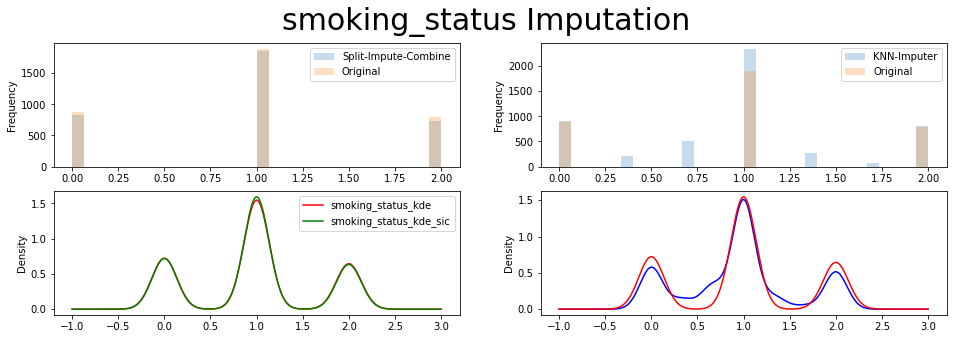

In [18]:

f = plt.figure(figsize=(16,5))

bin_num = 30
plt.subplot(2,2,1)
df_smoking_imputed_sic.smoking_status.plot(kind='hist', alpha=0.25, label="Split-Impute-Combine",bins=bin_num)


df.smoking_status.plot(kind='hist', alpha=0.25, label="Original",bins=bin_num)

plt.legend()
plt.ylim()

plt.subplot(2,2,2)
df_smoking_imputed.smoking_status.plot(kind='hist', alpha=0.25, label="KNN-Imputer",bins=bin_num)


df.smoking_status.plot(kind='hist', alpha=0.25, label="Original",bins=bin_num)

plt.legend()
plt.ylim()

plt.subplot(2,2,3)
df.smoking_status.plot.kde(bw_method=0.2,label='smoking_status_kde',color='red')
df_smoking_imputed_sic.smoking_status.plot.kde(bw_method=0.2,label='smoking_status_kde_sic',color='green')
plt.legend(loc='upper right')
plt.subplot(2,2,4)
df_smoking_imputed.smoking_status.plot.kde(bw_method=0.2,label='smoking_status_kde_knn',color='blue')
df.smoking_status.plot.kde(bw_method=0.2,label='smoking_status_kde',color='red')
plt.suptitle( 'smoking_status Imputation' , fontsize=30)
plt.show()

**It seems that spilit-impute-combine method gives better answers for smoking_status problem**

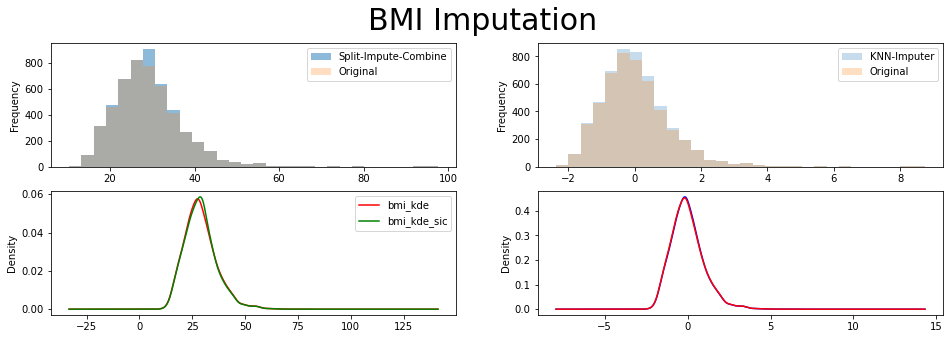

In [19]:

f = plt.figure(figsize=(16,5))

bin_num = 30
plt.subplot(2,2,1)
df_bmi_imputed_sic.bmi.plot(kind='hist', alpha=0.5, label="Split-Impute-Combine",bins=bin_num)
df.bmi.plot(kind='hist', alpha=0.25, label="Original",bins=bin_num)

plt.legend()
plt.ylim()

plt.subplot(2,2,2)
df_bmi_imputed.bmi.plot(kind='hist', alpha=0.25, label="KNN-Imputer",bins=bin_num)
df_total_after_normalization.bmi.plot(kind='hist', alpha=0.25, label="Original",bins=bin_num)

plt.legend()
plt.ylim()

plt.subplot(2,2,3)
df.bmi.plot.kde(bw_method=0.2,label='bmi_kde',color='red')
df_bmi_imputed_sic.bmi.plot.kde(bw_method=0.2,label='bmi_kde_sic',color='green')
plt.legend(loc='upper right')
plt.subplot(2,2,4)
df_bmi_imputed.bmi.plot.kde(bw_method=0.2,label='bmi_kde_knn',color='blue')
df_total_after_normalization.bmi.plot.kde(bw_method=0.2,label='bmi_kde',color='red')

plt.suptitle( 'BMI Imputation' , fontsize=30)
plt.show()

**It seems that KNN-Imputer method gives better answers for bmi problem**

<h1 style="background-color: lightblue;
           color: black;
           font-family: sans-serif;
           font-size: 300%;
           text-align: center;
           border-radius: 15px 50px;"
           >Data Visualization</h1>

Now we are back to our questions

**Question:** Is one gender at greater risk of stroke than the other?<br>
**Question:** Does living in the urban affect people's health and cause more strokes?<br>
**Question:** Do people who smoke, stroke more? Can we see any improvements if they quit smoking?
All of the results are shown in percentage In order to balance the statistical population & make unbiased decisions 

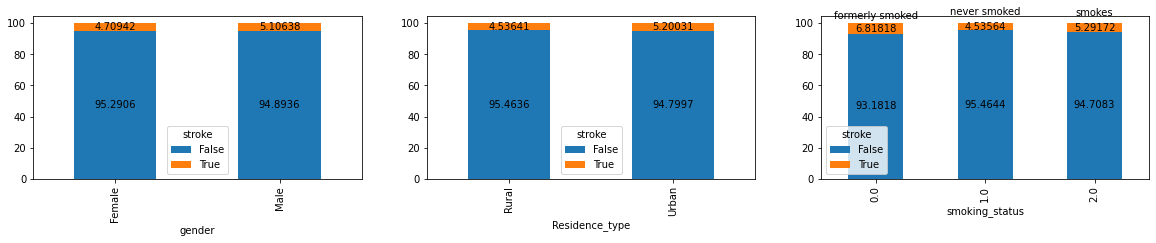

In [20]:
# plot overall cross tab with both groups
plt.figure(figsize=(20,3))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

pd.crosstab([df_original['gender']], # categories to cross tabulate
            df.stroke.astype(bool)).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax1,label=['woman', 'man']) 
for c in ax1.containers:
    
    # set the bar label
    ax1.bar_label(c, label_type='center')
    
pd.crosstab([df_original['Residence_type']], # categories to cross tabulate
            df.stroke.astype(bool)).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax2) 
for c in ax2.containers:
    
    # set the bar label
    ax2.bar_label(c, label_type='center')
pd.crosstab([df_smoking_imputed_sic['smoking_status']], # categories to cross tabulate
            df_smoking_imputed_sic.stroke.astype(bool)).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax3) 
rects = ax3.patches
label=['formerly smoked', 'never smoked','smokes']
print()
labels = [label[i] for i in range(0,3)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax3.text(rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="top")
for c in ax3.containers:
    
    # set the bar label
    ax3.bar_label(c, label_type='center')
plt.show()

+ these plots show that men are more at risk of having stroke
+ Rural residency is better for people who are in danger of having stroke
+ former smokers are more susceptible to stroke


**Question:**Do people with a specific type of work have to be visited by a doctor on an ongoing basis?
<br>
**Question:**Are married people more at risk of stroke?<br>



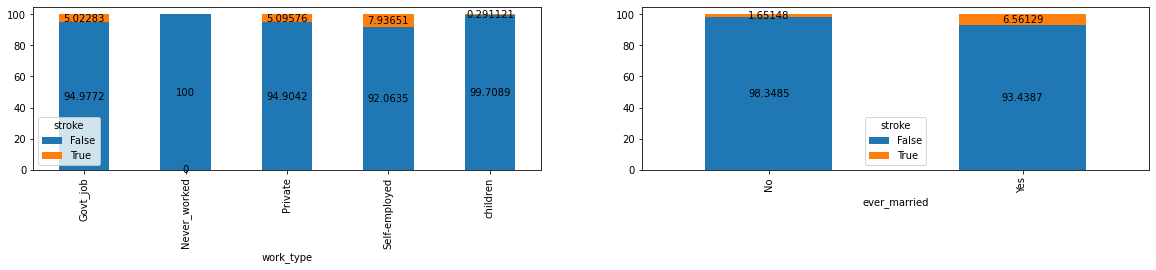

In [21]:
# plot overall cross tab with both groups
plt.figure(figsize=(20,3))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)


pd.crosstab([df_original['work_type']], # categories to cross tabulate
            df.stroke.astype(bool)).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax1,label=['woman', 'man']) 
for c in ax1.containers:
    
    # set the bar label
    ax1.bar_label(c, label_type='center')
    
pd.crosstab([df_original['ever_married']], # categories to cross tabulate
            df.stroke.astype(bool)).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax2) 
for c in ax2.containers:
    
    # set the bar label
    ax2.bar_label(c, label_type='center')

plt.show()

+ These graphs shows people who are self employed and after that who has government jobs are more at risk of having stroke
+ second graph shows that people who are married are more likely to have stroke

**Question:**Can it be said that age plays an important role in stroke occurrence in people?<br>
**Question:**Do the health factors such as hypertension and average glucose level have any affect on the stroke?

In [22]:
def plot_relationship_cont_vars_and_stroke():
    fig = plt.figure(figsize=(12, 8), facecolor="white")

    ax = [None for i in range(3)]
    gs = fig.add_gridspec(3, 1)
    gs.update(wspace=0, hspace=0.8)

    ax[0] = fig.add_subplot(gs[0, 0])
    ax[1] = fig.add_subplot(gs[1, 0])
    ax[2] = fig.add_subplot(gs[2, 0])

    _fontsize = 12
    _fontweightlight = "light"
    _fontweightbold = "bold"
    _fontfamily = "monospace"

    ax[0].text(
        0, 1.25,
        "Relationship Between Age and Stroke",
        fontsize=_fontsize,
        fontweight=_fontweightbold,
        fontfamily=_fontfamily,
        transform=ax[0].transAxes,
        ha="left",
        va="top",
        clip_on=False,
    )
    ax[0].text(
        0, 1.15,
        "The older a person is, the more likely he/she has had a stroke",
        fontsize=_fontsize,
        fontweight=_fontweightlight,
        fontfamily=_fontfamily,
        transform=ax[0].transAxes,
        ha="left",
        va="top",
        clip_on=False,
    )
    ax[1].text(
        0, 1.25,
        "Relationship Between Average Glucose Level and Stroke",
        fontsize=_fontsize,
        fontweight=_fontweightbold,
        fontfamily=_fontfamily,
        transform=ax[1].transAxes,
        ha="left",
        va="top",
        clip_on=False,
    )
    ax[1].text(
        0, 1.15,
        "There is no clear relationship between glucose level and stroke occurrance",
        fontsize=_fontsize,
        fontweight=_fontweightlight,
        fontfamily=_fontfamily,
        transform=ax[1].transAxes,
        ha="left",
        va="top",
        clip_on=False,
    )
    
    ax[2].text(
        0, 1.25,
        "Relationship Between BMI and Stroke",
        fontsize=_fontsize,
        fontweight=_fontweightbold,
        fontfamily=_fontfamily,
        transform=ax[2].transAxes,
        ha="left",
        va="top",
        clip_on=False,
    )
    ax[2].text(
        0, 1.15,
        "Obese people are more at risk of stroke occurance",
        fontsize=_fontsize,
        fontweight=_fontweightlight,
        fontfamily=_fontfamily,
        transform=ax[2].transAxes,
        ha="left",
        va="top",
        clip_on=False,
    )

    sns.kdeplot(
        data=df[df.stroke == 1],
        x="age",
        ax=ax[0],
        shade=True,
        color="lightcoral",
        alpha=1,
        label="Had Stroke"
    )
    sns.kdeplot(
        data=df[df.stroke == 0],
        x="age",
        ax=ax[0],
        shade=True,
        color="palegreen",
        alpha=0.5,
        label="No Stroke"
    )
    sns.kdeplot(
        data=df[df.stroke == 1],
        x="avg_glucose_level",
        ax=ax[1],
        shade=True,
        color="lightcoral",
        alpha=1,
        label="Had Stroke"
    )
    sns.kdeplot(
        data=df[df.stroke == 0],
        x="avg_glucose_level",
        ax=ax[1],
        shade=True,
        color="palegreen",
        alpha=0.5,
        label="No Stroke"
    )
    
    sns.kdeplot(
        data=df_bmi_imputed[df_bmi_imputed.stroke == 1],
        x="bmi",
        ax=ax[2],
        shade=True,
        color="lightcoral",
        alpha=1,
        label="Had Stroke"
    )
    sns.kdeplot(
        data=df_bmi_imputed[df_bmi_imputed.stroke == 0],
        x="bmi",
        ax=ax[2],
        shade=True,
        color="palegreen",
        alpha=0.5,
        label="No Stroke"
    )

    for i in range(3):
        ax[i].set_yticklabels("")
        ax[i].set_ylabel("")
        ax[i].legend(frameon=False)
        ax[i].tick_params(axis="y", length=0)

        for direction in ["top", "right", "left"]:
            ax[i].spines[direction].set_visible(False)

    ax[0].set_xlabel("age")
    ax[1].set_xlabel("Glucose Level")
    ax[2].set_xlabel("bmi")

    plt.show()

plot_relationship_cont_vars_and_stroke()

In [23]:
# sns boxplot
plt.subplots(figsize=(20, 5))

plt.subplot(1,2,1)
sns.boxplot(x="heart_disease", y="age", hue="stroke", data=df_bmi_imputed)
plt.title('Boxplot Example')

plt.subplot(1,2,2)
sns.swarmplot(x="stroke", y="age", hue="stroke", data=df_bmi_imputed)
plt.title('Swarm Example')

plt.show()

+ These plots show that older people are more at risk of having stroke 
+ There is no clear relationship between health factors such as Glucose level with Stroke occurance
+ Obese people are more likely to have stroke
+ people with hearth disease especially in older age range are at risk of having stroke

 **Question:** Do the health factors such as hypertension and heart disease together have any affect on the stroke?

<Figure size 2160x1080 with 0 Axes>

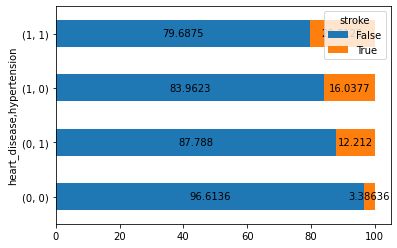

In [24]:
# the cross tab operator provides an easy way to get these numbers
plt.figure(figsize=(30,15))

ax1=pd.crosstab([df_original['heart_disease'],
                    df_original['hypertension']], # categories to cross tabulate
                    df_original.stroke.astype(bool)).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='barh', stacked=True) # how to group


ax1.plot(kind='barh', stacked=True)
for c in ax1.containers:
    
    # set the bar label
    ax1.bar_label(c, label_type='center')
plt.show()


+ This plot shows that hypertension and heart disease together increase the chance of having a stroke

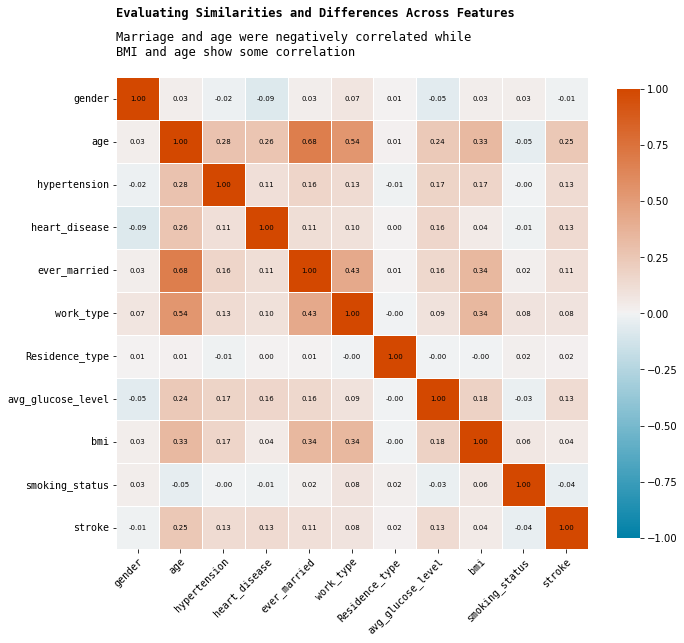

In [25]:
# Calculate the correlation matrix
corr_df = df_bmi_imputed.corr()

# Initialize the figure and gridspec
fig = plt.figure(figsize=(10, 10), facecolor="white")
gs = fig.add_gridspec(1, 1)
ax = [None for i in range(1)]

# Text properties
_fontsize = 12
_fontweightlight = "light"
_fontweightbold = "bold"
_fontfamily = "monospace"

# Add the first subplot
ax[0] = fig.add_subplot(gs[0, 0])

# Add title and subtitle
ax[0].text(
    0,
    1.15,
    "Evaluating Similarities and Differences Across Features",
    fontsize=_fontsize,
    fontweight=_fontweightbold,
    fontfamily=_fontfamily,
    transform=ax[0].transAxes,
    ha="left",
    va="top",
    clip_on=False,
)
ax[0].text(
    0,
    1.10,
    "Marriage and age were negatively correlated while\nBMI and age show some correlation",
    fontsize=_fontsize,
    fontweight=_fontweightlight,
    fontfamily=_fontfamily,
    transform=ax[0].transAxes,
    ha="left",
    va="top",
    clip_on=False,
)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, s=100, n=5, as_cmap=True)


# Plot the heatmap of the correlation matrix
sns.heatmap(
    corr_df,
    # mask=mask,
    ax=ax[0],
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.70},
)

plt.setp(
    ax[0].get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor",
    fontfamily=_fontfamily
)

plt.setp(
    ax[0].get_yticklabels(),
    fontfamily=_fontfamily
)

for i in range(corr_df.shape[0]):
    for j in range(corr_df.shape[1]):
        ax[0].text(
            j + 0.5,
            i + 0.5,
            "{:.2f}".format(corr_df.iloc[i, j]),
            ha="center",
            va="center",
            color="black",
            fontsize=7,
        )

plt.tight_layout()
plt.show()

Reviewing the data, we infer the following:

Age and Health Conditions: There is an overall increase in the count of hypertension, heart disease, and stroke with increasing age for both genders. The highest count of hypertension and heart disease is observed in the age group of 65-75 years for both genders.

Gender Differences: The count of hypertension, heart disease, and stroke is generally higher in males than in females. The average bmi and average glucose level is also higher in males compared to females.

BMI and Glucose Level: On average, both males and females have an increasing trend in their bmi and average glucose level with increasing age.

## Dimension Reduction

Our data does not have big corrolation to eachother and because it is medical data it is better to not use dimensional reduction but just for academic purposes we decide to keep the columns we think they are more sensible. The features we are going to keep are age, heart_disease,avg_glucose_level, bmi and smoking_status. based on corrolation graph, we decide to assume that age is pretty much corrolated to the ever_married and work_type and we also did not keep the age and avg_glucose_level just to make our computation faster so we eliminate them.

### Using PCA with sklearn
Now let's use PCA to find the two "best" dimensions of this data These are linear transforms to help project the features into something more understandable

In [26]:
df_DR=df_bmi_imputed.drop(['ever_married' , 'work_type','gender','avg_glucose_level'], axis=1)
df_DR.head()

age  hypertension  heart_disease  Residence_type       bmi  \
0  1.051139           0.0            1.0             1.0  0.981045   
1  0.785812           0.0            0.0             0.0  0.467527   
2  1.626015           0.0            1.0             0.0  0.459039   
3  0.255157           0.0            0.0             1.0  0.700944   
4  1.581794           1.0            0.0             0.0 -0.623168   

   smoking_status  stroke  
0             0.0     1.0  
1             1.0     1.0  
2             1.0     1.0  
3             2.0     1.0  
4             1.0     1.0

In [27]:
sns.set()
sns.pairplot(df_DR, hue="stroke", height=2)

In [28]:
y=df_DR['stroke']
X=df_DR.drop(['stroke'], axis=1)

In [29]:
from sklearn.decomposition import PCA

X = df_DR
y = df_DR.stroke
target_names = df_DR.stroke

pca = PCA(n_components=2)
pca.fit(X) # fit data and then transform it
X_pca = pca.transform(X)

# print the components

print ('pca:\n', pca.components_)

pca:
 [[ 0.71813511  0.07528014  0.03943203  0.00441298  0.68977978  0.00588125
   0.03478177]
 [-0.67776612 -0.03609992 -0.05504283 -0.00986046  0.7139617   0.15489697
  -0.0496846 ]]


Text(0, 0.5, '-0.68* -0.04*hyperte -0.06*heart_di -0.01*Residence +0.71* +0.15*smoking_s -0.05*s ')

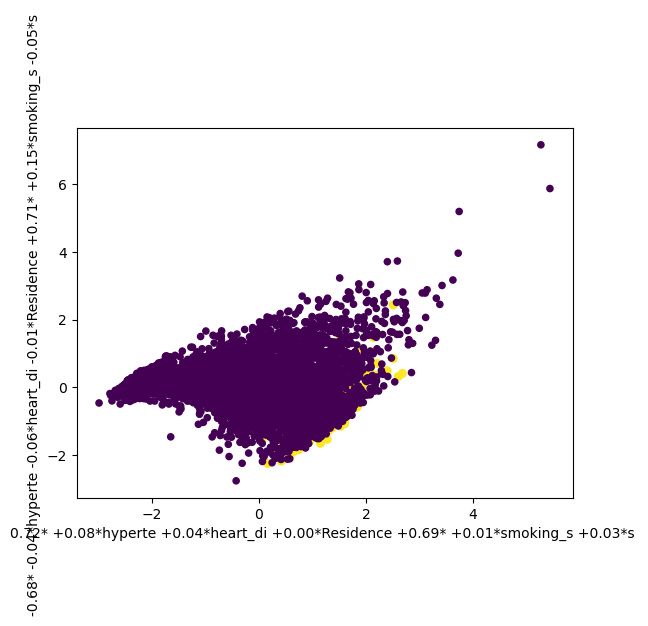

In [30]:
cmap = sns.set(style="darkgrid") 

# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array
  
plt.style.use('default')
# now let's get to the Data Analytics!
data=['age','hypertension','heart_disease','Residence_type','bmi','smoking_status','stroke']
pca_weight_strings = get_feature_names_from_weights(pca.components_, data) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

from matplotlib.pyplot import scatter

# scatter plot the output, with the names created from the weights
ax = scatter(X_pca[:,0], X_pca[:,1], c=y, s=(y+2)*10, cmap=cmap)
plt.xlabel(pca_weight_strings[0]) 
plt.ylabel(pca_weight_strings[1])

====================================================<br>
It seems that because our data samples are not corrolated dimension reduction did not help seperating the data results

In [31]:

def plot_explained_variance(pca):
    
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

pca = PCA(n_components=4)
X_pca = pca.fit(X)
plot_explained_variance(pca)

==============================================================<br>
This graphs shows that age and after that Hypertension having the most variance ratios in our data

## Uniform manifold approximation and projection (UMAP)

In [32]:
def prep_umapped_df():
    df_fac = df_original.copy()

    df_fac.fillna({"smoking_status": "not reported"}, inplace=True)

    # Factorized (e.g., numerical) dataframe
    for col in df_fac.columns:
        if df_fac[col].dtype == "object":
            df_fac[col] = pd.factorize(df_fac[col])[0]

    # Impute missing values in the dataframe
    imputer = KNNImputer(n_neighbors=5)
    df_fac = imputer.fit_transform(df_fac)

    new_df = {}
    for i, col in enumerate(df.columns.to_list()[1:], start=1):
        new_df[col] = df_fac[:, i]

    return pd.DataFrame(new_df)

In [33]:
def umap_model_1():
    df_fac = prep_umapped_df()

    umap_model = umap.UMAP(n_components=4)
    embeddings = umap_model.fit_transform(df_fac)

    # Plot the results
    plt.scatter(
        embeddings[:, 0], embeddings[:, 1], c=df_fac["stroke"][::-1], alpha=0.6
    )
    plt.colorbar(label="Stroke")
    plt.title("UMAP visualization of Stroke Risk")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")

    plt.show()


umap_model_1()

NameError: name 'umap' is not defined

=====================================================<br>
this graph shows that UMAP dimension reduction could not seperate the samples very well, We assume that we need higher dimension

In [ ]:
warnings.simplefilter('ignore')
def umap_model_jacc():
    df_fac = prep_umapped_df()

    umap_model = umap.UMAP()
    embeddings = umap_model.fit(df_fac)

    umap.plot.diagnostic(
        embeddings, diagnostic_type="neighborhood",
        cmap="Blues", point_size=5
    )


umap_model_jacc()

In [ ]:
def umap_model_pca():
    df_fac = prep_umapped_df()

    umap_model = umap.UMAP(n_neighbors=12, metric="euclidean")
    embeddings = umap_model.fit(df_fac)

    umap.plot.diagnostic(embeddings, diagnostic_type="pca")


umap_model_pca()

In [ ]:
def umap_model_dbscan():
    df_fac = prep_umapped_df()

    umap_model = umap.UMAP(random_state=42, n_components=2)
    embeddings = umap_model.fit_transform(df_fac)
    clusterer = hdbscan.HDBSCAN(prediction_data=True, min_cluster_size=50).fit(
        embeddings
    )

    plt.figure()
    plt.scatter(
        embeddings[:, 0],
        embeddings[:, 1],
        s=10,
        c=clusterer.labels_,
        edgecolors="none",
        cmap="jet",
    )
    plt.colorbar()

    plt.title("Colored by DBSCAN")

    plt.show()


umap_model_dbscan()

## Reference


[1] "About Stroke", American Stroke Association
Source: https://www.stroke.org/en/about-stroke
Accessed on: 2/9/2023

[2] "Preventing Another Stroke", American Stroke Association
Source: https://www.stroke.org/en/life-after-stroke/preventing-another-stroke
Accessed on: 2/9/2023

[3] Dr. Larson github codes